In [1]:
# Load Dataset Cifar 10

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

2024-06-26 20:27:37.576805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load Cifar Dataset

In [4]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
## Menampilkan Sample Image from Dataset

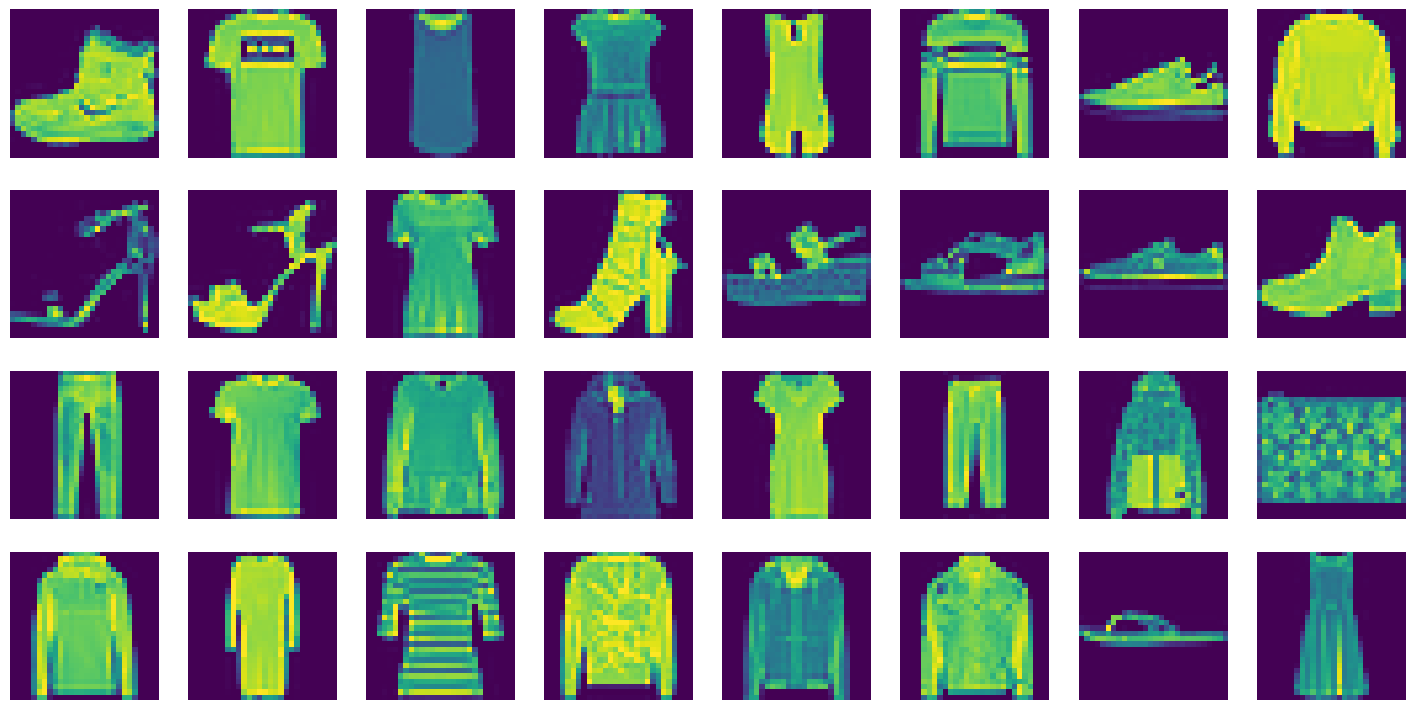

In [7]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
 
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

In [8]:
## Dataset Preprocessing menambahkan label

In [9]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
 
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])
 
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
 
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  9
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
## Dataset and Training Configuration Parameters

In [11]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
     
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

In [12]:
## CNN Model Implementation in Keras
## Model Structure
## Define the Convolutional Blocks for the CNN

In [13]:
def cnn_model(input_shape=(28, 28, 1)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',  input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [14]:
## define the Classifier for the CNN
## Create the Model

In [15]:
# Create the model.
model = cnn_model()
model.summary()

/Users/saepul/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,426 (689.16 KB)

 Trainable params: 176,426 (689.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
## compile the model 

In [17]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

In [18]:
## Train the model

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 99s 585ms/step - accuracy: 0.5275 - loss: 1.2949 - val_accuracy: 0.7235 - val_loss: 0.9211
Epoch 2/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 106s 641ms/step - accuracy: 0.8278 - loss: 0.4846 - val_accuracy: 0.7830 - val_loss: 0.6690
Epoch 3/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 129s 780ms/step - accuracy: 0.8644 - loss: 0.3668 - val_accuracy: 0.8033 - val_loss: 0.5355
Epoch 4/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 116s 704ms/step - accuracy: 0.8830 - loss: 0.3120 - val_accuracy: 0.8218 - val_loss: 0.4925
Epoch 5/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 103s 621ms/step - accuracy: 0.8951 - loss: 0.2770 - val_accuracy: 0.8759 - val_loss: 0.3590
Epoch 6/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 96s 582ms/step - accuracy: 0.9090 - loss: 0.2451 - val_accuracy: 0.9017 - val_loss: 0.3011
Epoch 7/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 94s 567ms/step - accuracy: 0.9193 - loss: 0.2192 - val_accuracy: 0.9069 - val_loss: 0.2789
Epoch 8/31
165/165 ━━━━━━━━━━━━━━━━━━━━ 98s 594ms/step - accuracy: 0.9273 - los

In [ ]:
## Plot the training result

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [ ]:
## Tampilkan data result

In [ ]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
## Menambahkan Dropout to the Model

In [ ]:
## Mendefinisikan sebuah Model (with dropout)

In [ ]:
def cnn_model_dropout(input_shape=(28, 28, 1)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [ ]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()


In [ ]:
## Compile the model (with dropout)

In [ ]:
model_dropout.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'],
                     )

In [ ]:
## Train the model (with dropout)

In [ ]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE, 
                            epochs=TrainingConfig.EPOCHS, 
                            verbose=1, 
                            validation_split=0.3,
                           )

In [ ]:
## Plot the training result

In [ ]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
## Saving dan Loading Models

In [ ]:
## Saving Models

In [ ]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save('model_dropout.keras')

In [ ]:
## Loading Models

In [ ]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.keras')

In [ ]:
## Model Evaluation

In [ ]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

In [ ]:
## Make Predictions on Sample Test Images

In [ ]:
def evaluate_model(dataset, model):
 
    class_names = ['t-shirt/top',
                   'trouser',
                   'pullover',
                   'dress',
                   'coat',
                   'sandal',
                   'shirt',
                   'sneaker',
                   'bag',
                   'ankle boot' ]
    num_rows = 3
    num_cols = 6
     
    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]
 
    # Get predictions from model.  
    predictions = model.predict(data_batch)
 
    plt.figure(figsize=(20, 8))
    num_matches = 0
         
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
 
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
             
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
             
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
                 
    acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return


In [ ]:
evaluate_model(X_test, reloaded_model_dropout)

In [ ]:
## Confussion Matrix 

In [ ]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)
 
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)
 
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)
 
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()